In [5]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy.stats as stats, pandas as pd, os, glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## ideal stimulus & outcome distributions

In [6]:
# len_ts = len(np.arange(-.4,.4,.01))

# rew_dists, dist_i = {}, 0
# dist_names = ['pen_comp, pen_cntxt', 'pen_comp, rew_cntxt',
#               'base, pen_cntxt',     'base, rew_cntxt',
#               'rew_comp, pen_cntxt', 'rew_comp, rew_cntxt']
# divs, tar_dist = [-.2, .2, .0], .1
# plot_i = 0

# for div in divs:

#     for tar in [div - tar_dist, div + tar_dist]:
#         rew_dist_ls = []

#         for slider_pos in np.arange(-.4,.4,.01): 

#             if (slider_pos >= div and tar >= div)\
#             or (slider_pos <= div and tar <= div):
#             # if correct side

#                 outcome = 2 if tar > div else 1
#                 addn_pts = 1 - 1.5 * abs(tar - slider_pos)

#             else:

#                 outcome = -1 if tar > div else -2
#                 addn_pts = - 1.5 * abs(tar - slider_pos)

#             rew_dist_ls.append(outcome + addn_pts)
    
#         rew_dists[dist_names[dist_i]] = rew_dist_ls
#         dist_i += 1

# # plots
# for div in divs:

#     # avg_rew_dist = np.mean([
#     #     rew_dists[dist_names[plot_i]],
#     #     rew_dists[dist_names[plot_i+1]]
#     # ], axis=0)

#     pen_dist = np.random.uniform(max(-.4, div-.4), div, size=100000)
#     rew_dist = np.random.uniform(min(div+.4, .4), div, size=100000)

#     stim_dist = np.concatenate([pen_dist, rew_dist])

#     counts, bins = np.histogram(stim_dist, bins=60, density=True)
#     scale_factor = 1 / max(counts)
#     counts *= scale_factor

#     plt.figure(figsize=(8, 3))
#     plt.title('No compression')
#     x_vals = np.linspace(-0.4, 0.4, len_ts)
#     plt.plot(x_vals, rew_dists[dist_names[plot_i]], color='red', label='outcome distribution for penalty context')
#     plt.plot(x_vals, rew_dists[dist_names[plot_i+1]], color='blue', label='outcome distribution for reward context')
#     plt.ylabel('Reward')
#     plt.hist(bins[:-1], bins=bins, weights=counts, alpha=0.6, color="orange")
#     plt.ylim([-3, 3])
#     plot_i += 2

#     # misc
#     plt.axvline(div - tar_dist, color='red', linestyle='--', label = 'penalty contxt')
#     plt.axvline(div + tar_dist, color='blue', linestyle='--', label = 'reward contxt')
#     plt.axvline(div, color='black')
#     plt.axhline(0, color='black')

#     # plt.legend()
#     plt.show()





## load df and check

In [7]:
subjs = ['tomas', 'Zelin', 'renee', 'robert', 'daria']
subjs_anon = ['a_v2', 'b_v2', 'c_v2', 'd', 'e']

df = pd.read_csv(glob.glob(f'./results/*{subjs[0][2:]}*csv')[0])
for subj in subjs[1:]:
    df_temp = pd.read_csv(glob.glob(f'./results/*{subj[2:]}*csv')[0])[1:]
    df = pd.concat([df, df_temp])

df = df.rename(columns={'context': 'valence'})
print(f'df_len = {len(df)} = {1 + 240*3 + 300*2}')

# if trials.slider_resp.keys == None or trials.submit_resp.keys == None, then trials.correct = 0 and trials.outcome = 0
df.loc[df['slider_resp.keys'].isna() | df['submit_resp.keys'].isna(), ['correct', 'outcome']] = 0

df['correct'].value_counts()
# df = df[df['correct'] != 0]
# print(f'new df_len = {len(df)}')

df_len = 1321 = 1321


correct
 1.0    1039
-1.0     250
 0.0      32
Name: count, dtype: int64

In [9]:
# df_tst = df[df['subj'] == 'renee']
# df_tst['ease'] = abs(df_tst['target'] - df_tst['disp_divider'])
#  # plot histogram of ease
# plt.figure(figsize=(10, 2))
# sns.histplot(df_tst['ease'])
# # plt.ylim(0, 14)
# plt.title('Ease of the task')
# plt.show()

# # print proportion of trials where ease <= .1
# print(f"Proportion of trials where ease <= .1: {len(df_tst[df_tst['ease'] <= .1]) / len(df_tst)}")

## filter out easy trials

In [10]:
df_OG = df.copy()

# create choice col s.t., choice = 1 (risk) if outcome == abs(2) elif 0 (safety) if outcome == abs(1) else 'none'
df['choice'] = df['outcome'].apply(lambda x: 1 if abs(x) == 2 else 0 if abs(x) == 1 else 'none')
print(f'# no-choice trials: {len(df[df["choice"] == "none"])}')
# consider only outcomes where a choice was made
df = df[df['choice'] != 'none'].copy()

df = df[df['target'] - df['disp_divider'] <= .1]
print(f'# trials with target - divider <= .1: {len(df)/len(df_OG)}')

# no-choice trials: 32
# trials with target - divider <= .1: 0.6623769871309614


## accuracy & RT

In [11]:
# # change all instances of -1 in correct col to 0
# df['correct'] = df['correct'].apply(lambda x: 0 if x == -1 else x)
# accs = df.groupby('subj')['correct'].mean()
# accs = accs[subjs].values
# RTs = df.groupby('subj')['submit_resp.rt'].mean()
# RTs = RTs[subjs].values
# RTs_sem = df.groupby('subj')['submit_resp.rt'].sem() * 1.96

# # create subplots, one below the other
# fig, axes = plt.subplots(3, 1, figsize=(8, 9))

# # acc by subj
# axes[0].bar(subjs_anon, accs, color='purple', alpha=0.6)
# axes[0].set_title('Accuracy')
# axes[0].set_ylim([0, 1])
# axes[0].set_xlabel('subjs')

# # RT by subj
# axes[1].bar(subjs_anon, RTs, color='purple', alpha=0.6, yerr=RTs_sem, capsize=2)
# axes[1].set_title('RT')
# axes[1].set_xlabel('subjs')

# # RT*correct by subj
# df['response_type'] = df['correct'].apply(lambda x: 'correct' if x == 1 else 'incorrect')
# sns.barplot(data=df, x='subj', y='submit_resp.rt', hue='response_type', palette={'red','blue'}, ci="sd", ax=axes[2])
# axes[2].set_title('RT by accuracy')
# axes[2].set_ylabel('')
# axes[2].set_xlabel('subjs')
# axes[2].set_xticks(range(len(subjs_anon)))
# axes[2].set_xticklabels(subjs_anon)
# axes[2].legend()

# # adjust layout
# plt.tight_layout()
# plt.show()


## accuracy & RT by valence

In [12]:
# # create subplots, one below the other
# fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# # accuracy by valence by subj
# sns.barplot(data=df, x='subj', y='correct', hue='valence', palette=['blue', 'red'], ci=None, ax=axes[0])
# axes[0].set_title('Accuracy by Valence')
# axes[0].set_xlabel('subjs')
# axes[0].set_ylabel('')
# axes[0].set_ylim([0, 1])
# axes[0].set_xticks(range(len(subjs_anon)))
# axes[0].set_xticklabels(subjs_anon)
# axes[0].get_legend().remove()  # Remove legend

# # RT by valence by subj
# sns.barplot(data=df, x='subj', y='submit_resp.rt', hue='valence', palette=['blue', 'red'], ci="sd", ax=axes[1])
# axes[1].set_title('RT by Valence')
# axes[1].set_xlabel('subjs')
# axes[1].set_ylabel('')
# axes[1].set_xticks(range(len(subjs_anon)))
# axes[1].set_xticklabels(subjs_anon)
# axes[1].legend()

# # adjust layout
# plt.tight_layout()
# plt.show()


## accuracy & RT by valence and compression

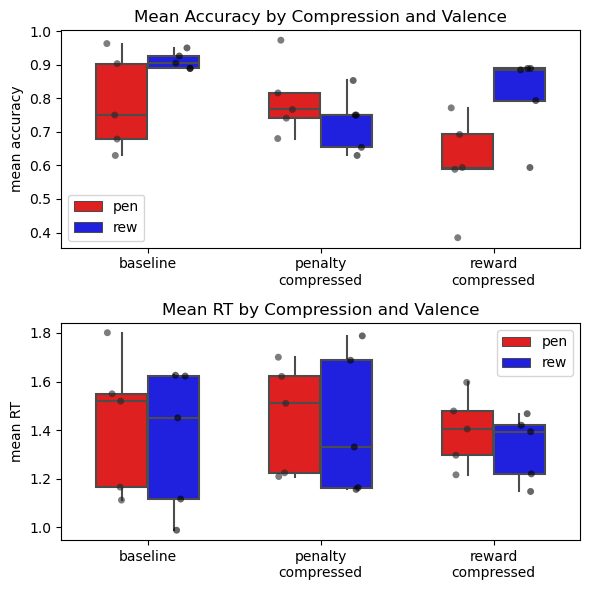

In [ ]:
df['compression'] = df['divider'].apply(lambda x: 'baseline' if x == 0 else 'penalty compressed' if x == -.2 else 'reward compressed')
df['correct'] = df['correct'].apply(lambda x: 0 if x == -1 else x)
# print(df['compression'].value_counts())
# print(df['correct'].value_counts())

# calculate mean accuracy by valence and compression, averaged over subjects
subj_mean_accs_df = df.groupby(['subj', 'compression', 'valence'])['correct'].mean().reset_index()
subj_mean_RT_df = df.groupby(['subj', 'compression', 'valence'])['submit_resp.rt'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(6, 6))
sns.boxplot(data=subj_mean_accs_df, x='compression', y='correct', hue='valence',
            showcaps=False, fliersize=0, width=0.6, palette=['red', 'blue'], ax=axes[0])
sns.stripplot(data=subj_mean_accs_df, x='compression', y='correct', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=axes[0])
axes[0].set_ylabel('mean accuracy')
axes[0].set_xlabel('')
axes[0].set_title('Mean Accuracy by Compression and Valence')
axes[0].legend()
axes[0].set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

sns.boxplot(data=subj_mean_RT_df, x='compression', y='submit_resp.rt', hue='valence', showcaps=False, fliersize=0, width=0.6, palette=['red', 'blue'], ax=axes[1])
sns.stripplot(data=subj_mean_RT_df, x='compression', y='submit_resp.rt', hue='valence', 
              dodge=True, color='black', alpha=0.6, jitter=True, legend=False, ax=axes[1])
axes[1].set_ylabel('mean RT')
axes[1].set_xlabel('')
axes[1].set_title('Mean RT by Compression and Valence')
axes[1].legend()
axes[1].set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

plt.tight_layout()
plt.show()

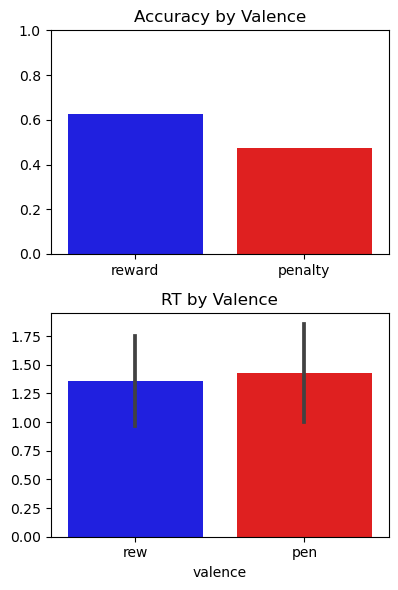

In [ ]:
# create subplots, one below the other
fig, axes = plt.subplots(2, 1, figsize=(4, 6))

# accuracy by valence
accs = df.groupby('subj')['correct'].mean()
accs = accs[subjs].values
sns.barplot(data=df, x='valence', y='correct', palette=['blue', 'red'], ci=None, ax=axes[0])
axes[0].set_title('Accuracy by Valence')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_ylim([0, 1])
axes[0].set_xticklabels(['reward', 'penalty'])

# RT by valence
sns.barplot(data=df, x='valence', y='submit_resp.rt', palette=['blue', 'red'], ci="sd", ax=axes[1])
axes[1].set_title('RT by Valence')
axes[1].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['reward', 'penalty'])

# adjust layout
plt.tight_layout()
plt.show()


## accuracy & RT by compression 

In [ ]:
# df['compression'] = df['divider'].apply(lambda x: 'baseline' if x == 0 else 'penalty compressed' if x == -.2 else 'reward compressed')
# print(df['compression'].value_counts())


# # create subplots, one below the other
# fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# # accuracy by valence
# sns.barplot(data=df, x='subj', y='correct', hue='compression', palette=['grey', 'red', 'blue'], ci=None, ax=axes[0])
# axes[0].set_title('Accuracy by Compression')
# axes[0].set_xlabel('subjs')
# axes[0].set_ylabel('')
# axes[0].set_ylim([0, 1])
# axes[0].set_xticks(range(len(subjs_anon)))
# axes[0].set_xticklabels(subjs_anon)
# axes[0].get_legend().remove()  # Remove legend

# # RT by valence
# sns.barplot(data=df, x='subj', y='submit_resp.rt', hue='compression', palette=['grey', 'red', 'blue'], ci="sd", ax=axes[1])
# axes[1].set_title('RT by Compression')
# axes[1].set_xlabel('subjs')
# axes[1].set_ylabel('')
# axes[1].set_xticks(range(len(subjs_anon)))
# axes[1].set_xticklabels(subjs_anon)
# axes[1].legend(fontsize='small')

# # adjust layout
# plt.tight_layout()
# plt.show()

compression
reward compressed     312
penalty compressed    300
baseline              263
Name: count, dtype: int64


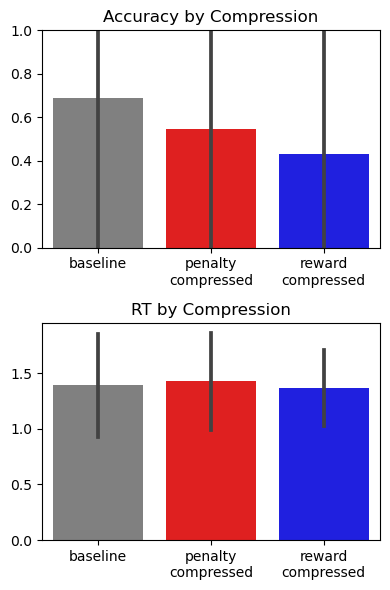

In [ ]:
df['compression'] = df['divider'].apply(lambda x: 'baseline' if x == 0 else 'penalty compressed' if x == -.2 else 'reward compressed')
print(df['compression'].value_counts())

# create subplots, one below the other
fig, axes = plt.subplots(2, 1, figsize=(4, 6))

# accuracy by compression
sns.barplot(data=df, x='compression', y='correct', palette=['grey', 'red', 'blue'], ci='sd', ax=axes[0])
axes[0].set_title('Accuracy by Compression')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_ylim([0, 1])
axes[0].set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])


# RT by compression
sns.barplot(data=df, x='compression', y='submit_resp.rt', palette=['grey', 'red', 'blue'], ci="sd", ax=axes[1])
axes[1].set_title('RT by Compression')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['baseline', 'penalty\ncompressed', 'reward\ncompressed'])

# adjust layout
plt.tight_layout()
plt.show()


## safety vs risk

# no-choice trials: 0
# difficult trials: 436


/var/folders/p4/t7vvsznd2mxb3qmtg4k0k6880000gp/T/ipykernel_32540/3187745004.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diffVeasy['choice'] = df_diffVeasy['choice'].apply(lambda x: 'risky' if x == 1 else 'safe')


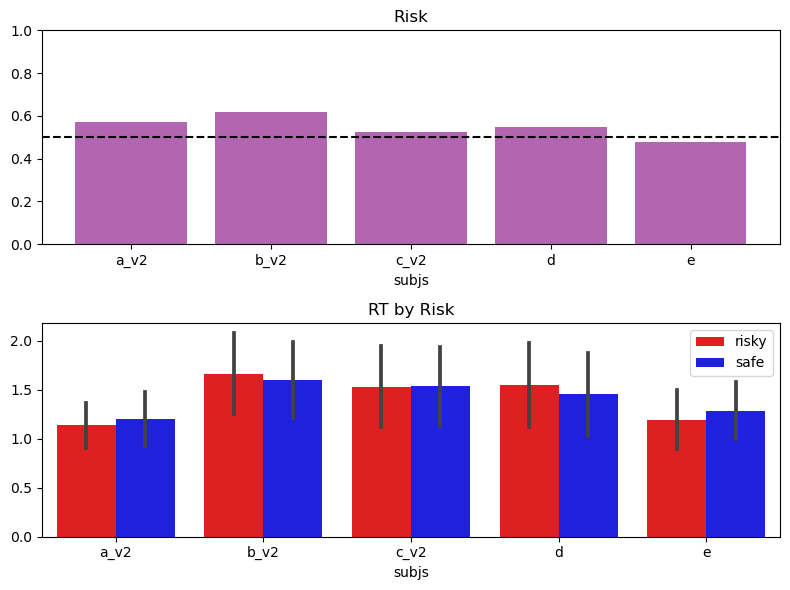

In [13]:
# create choice col s.t., choice = 1 (risk) if outcome == abs(2) elif 0 (safety) if outcome == abs(1) else 'none'
df['choice'] = df['outcome'].apply(lambda x: 1 if abs(x) == 2 else 0 if abs(x) == 1 else 'none')
print(f'# no-choice trials: {len(df[df["choice"] == "none"])}')
# consider only outcomes where a choice was made
df_choice = df[df['choice'] != 'none'].copy()

# consider only difficult or easy trials
df_diffVeasy = df_choice[abs(df_choice['target'] - df_choice['disp_divider']) < .1]
print(f'# difficult trials: {len(df_diffVeasy)}')

risks = df_diffVeasy.groupby('subj')['choice'].mean()
risks = risks[subjs].values

# create subplots, one below the other
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# risk
axes[0].bar(subjs_anon, risks, color='purple', alpha=0.6)
axes[0].set_title('Risk')
axes[0].set_ylim([0, 1])
axes[0].set_xlabel('subjs')
axes[0].axhline(0.5, color='black', linestyle='--')

# RT by risk
# map choice from 0 to safe and 1 to risky for sns.barplot
df_diffVeasy['choice'] = df_diffVeasy['choice'].apply(lambda x: 'risky' if x == 1 else 'safe')
sns.barplot(data=df_diffVeasy, x='subj', y='submit_resp.rt', hue='choice', palette=['red', 'blue'], ci="sd", ax=axes[1])
axes[1].set_title('RT by Risk')
axes[1].set_ylabel('')
axes[1].set_xlabel('subjs')
axes[1].set_xticks(range(len(subjs_anon)))
axes[1].set_xticklabels(subjs_anon)
axes[1].legend()

# adjust layout
plt.tight_layout()
plt.show()


## psychometric curves

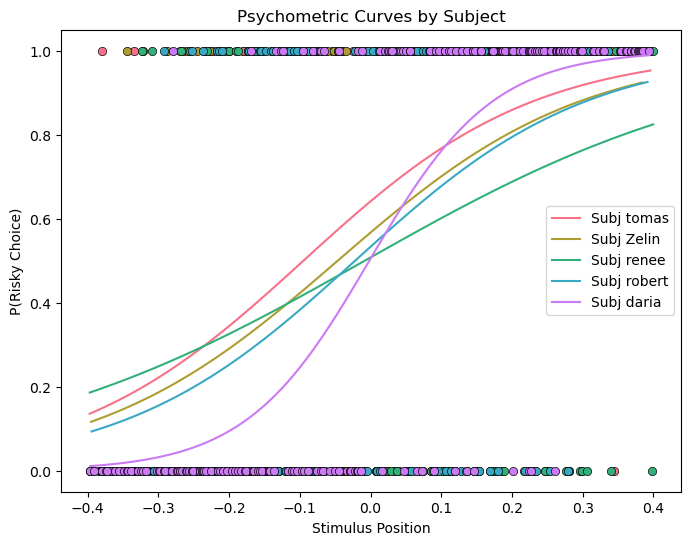

In [14]:
from scipy.optimize import curve_fit

# Define sigmoid function
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Convert choice to numeric (1 for risky, 0 for safe)
df_choice['choice_numeric'] = df_choice['choice'].map({'risky': 1, 'safe': 0})

# Initialize plot
plt.figure(figsize=(8, 6))

# Get unique subjects
subjects = df_choice['subj'].unique()

# Define color palette for subjects
palette = sns.color_palette("husl", len(subjects))

# Loop through each subject
for i, subj in enumerate(subjects):
    # Compute mean risky choice probability at each stim_pos for the subject
    grouped = df_choice[df_choice['subj'] == subj].groupby('stim_pos')['choice'].mean().reset_index()

    # Fit sigmoid function
    popt, _ = curve_fit(sigmoid, grouped['stim_pos'], grouped['choice'])
    
    # Generate smooth x values for curve
    x_vals = np.linspace(grouped['stim_pos'].min(), grouped['stim_pos'].max(), 100)
    y_vals = sigmoid(x_vals, *popt)

    # Plot fitted sigmoid curve
    plt.plot(x_vals, y_vals, color=palette[i], linestyle='-', label=f'Subj {subj}')

    # Scatter plot for observed probabilities
    sns.scatterplot(data=grouped, x='stim_pos', y='choice', color=palette[i], edgecolor='black')

# Labels and legend
plt.xlabel('Stimulus Position')
plt.ylabel('P(Risky Choice)')
plt.title('Psychometric Curves by Subject')
plt.legend()
plt.show()


## risk by difficulty

# no-choice trials: 32
quartiles: [0.07335201 0.14383345 0.24246098]


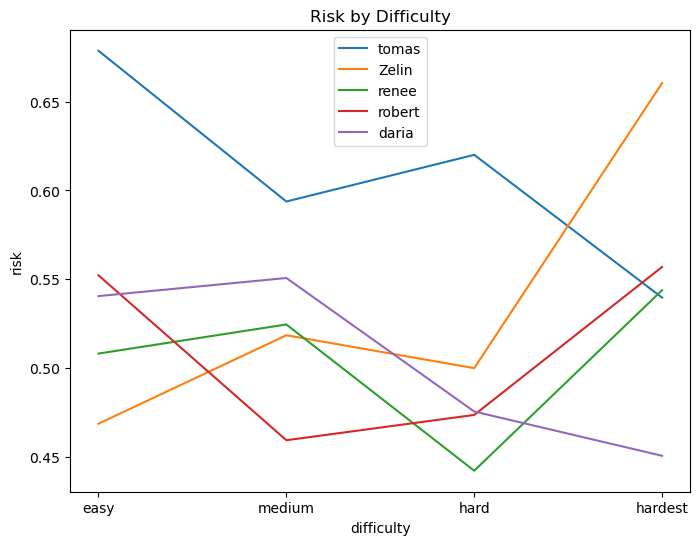

In [ ]:
# # create choice col s.t., choice = 1 (risk) if outcome == abs(2) elif 0 (safety) if outcome == abs(1) else 'none'
# df['choice'] = df['outcome'].apply(lambda x: 1 if abs(x) == 2 else 0 if abs(x) == 1 else 'none')
# print(f'# no-choice trials: {len(df[df["choice"] == "none"])}')
# # consider only outcomes where a choice was made
# df_choice = df[df['choice'] != 'none'].copy()

# # create col storing abs(target - disp_divider)
# df_choice['ease'] = abs(df_choice['target'] - df_choice['disp_divider'])

# # for every quartile of ease, get the mean of choice
# quartiles = np.percentile(df_choice['ease'], [25, 50, 75])
# print(f'quartiles: {quartiles}')
# # create col storing quartile
# df_choice['difficulty'] = df_choice['ease'].apply(lambda x: 3 if x <= quartiles[0] else 2 if x <= quartiles[1] else 1 if x <= quartiles[2] else 0)

# risks = df_choice.groupby(['subj', 'difficulty'])['choice'].mean()
# risks = risks[subjs].values

# # risks contains 4 values for each subj, 1 for each quartile
# # for each subject, create a line plot of risk by quartile
# fig, ax = plt.subplots(figsize=(8, 6))
# for i, subj in enumerate(subjs):
#     ax.plot(range(1, 5), risks[i*4:(i+1)*4], label=subj)
# ax.set_title('Risk by Difficulty')
# ax.set_xlabel('difficulty')
# ax.set_ylabel('risk')
# ax.set_xticks(range(1, 5))
# ax.set_xticklabels(['easy', 'medium', 'hard', 'hardest'])
# ax.legend()
# plt.show()


## stimulus sampling

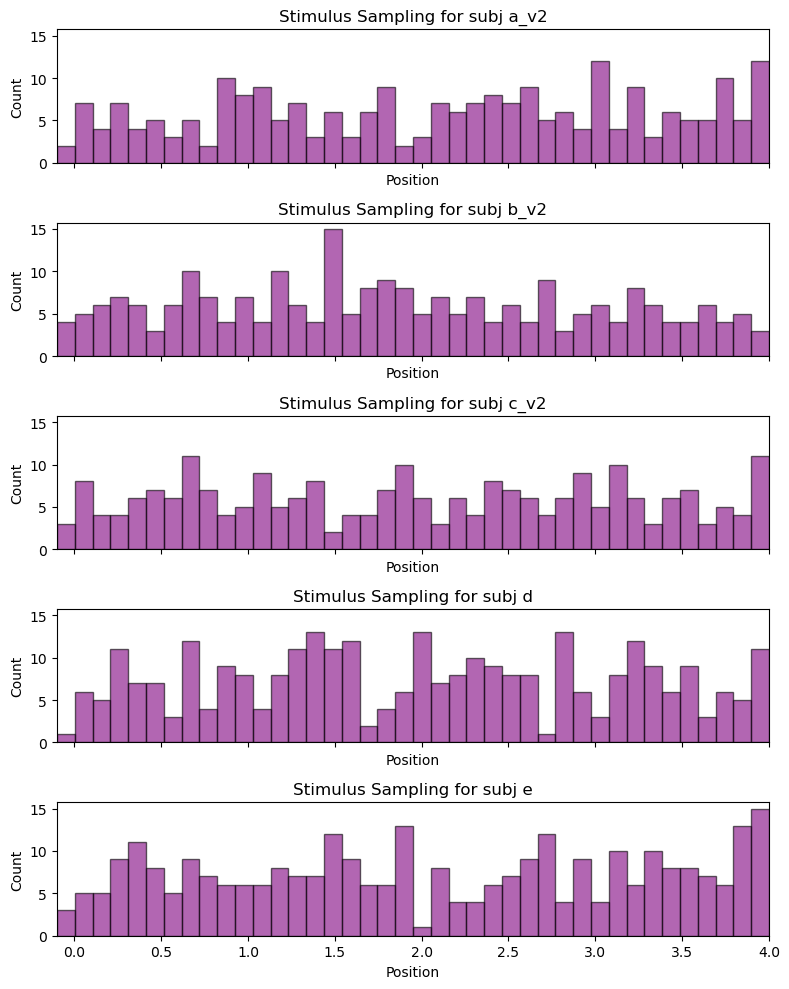

In [12]:
bins = np.linspace(-0.1, 4, 41)  # Define 41 bins from -0.1 to 4

fig, axes = plt.subplots(len(subjs), 1, figsize=(8, 2 * len(subjs)), sharex=True, sharey=True)

for ax, (subj, subj_anon) in zip(axes, zip(subjs, subjs_anon)):
    df_subj = df[df['subj'] == subj]
    
    ax.hist(df_subj['stim_file_pos'], bins=bins, color='purple', alpha=0.6, edgecolor='black')
    ax.set_title(f'Stimulus Sampling for subj {subj_anon}')
    ax.set_xlabel('Position')
    ax.set_ylabel('Count')

plt.xlim(-0.1, 4)  # Ensure consistent x-axis limits
plt.tight_layout()
plt.show()


# OLD CODE BELOW

## accuracy as a function of perceptual difficulty

Median target divider distance: 0.13305484765371497


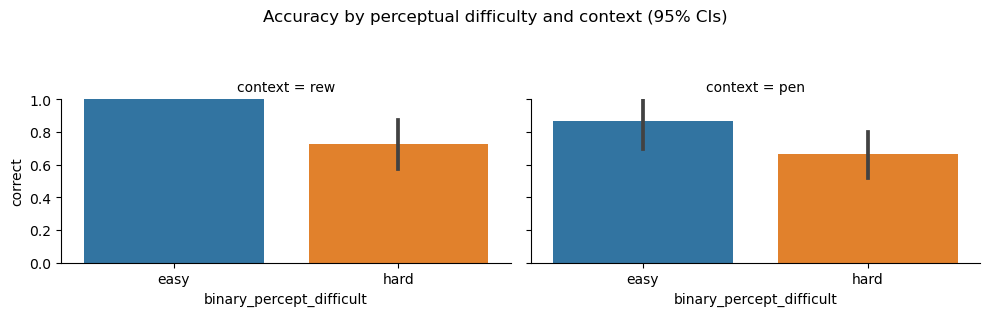

In [43]:
subj = 'robert'
df = pd.read_csv(glob.glob(f'./results/*{subj}*csv')[0])
if subj == 'rudra':
    df = df[df['blocks.thisN'] != 1]

df['tar_div_dist'] = abs(df['target'] - df['disp_divider'])
median_tar_div_dist = df['tar_div_dist'].median()
print(f'Median target divider distance: {median_tar_div_dist}')
df['binary_percept_difficult'] = df['tar_div_dist'] < .2

sns.catplot(
    data=df,
    x=df['binary_percept_difficult'].map({False: 'easy', True: 'hard'}),
    y='correct',
    col='context',  # creates separate plots for 'pen' and 'rew'
    kind='bar',
    errorbar=('ci', 95)
)

plt.subplots_adjust(top=0.8)  # Adjust title positioning
plt.suptitle('Accuracy by perceptual difficulty and context (95% CIs)')
plt.ylim(0, 1)
plt.show()


In [ ]:
# # Get unique subjects
# subjs_sorted = sorted(df_choice['subj'].unique())  # Ensuring consistent order
# n_subjs = len(subjs_sorted)

# # Create subplots
# fig, axes = plt.subplots(n_subjs, 1, figsize=(8, 3 * n_subjs), sharex=True)

# for i, subj in enumerate(subjs_sorted):
#     ax = axes[i]
#     sns.barplot(
#         data=grouped[grouped['subj'] == subj], x='stim_file_pos', y='count', color='purple', alpha=0.6, ax=ax
#     )
#     ax.set_title(f'Subject {subjs_anon[i]}')  # Use anonymized labels
#     ax.set_ylabel('Risky Choice Count')

# axes[-1].set_xlabel('Stimulus Position')  # Set x-label only for the last subplot
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()
